# Convolution example   
This notebook is meant to be a test for the convolution function used in the [Synthetic_real_EEG_conv.ipynb](Synthetic_real_EEG_conv.ipynb)

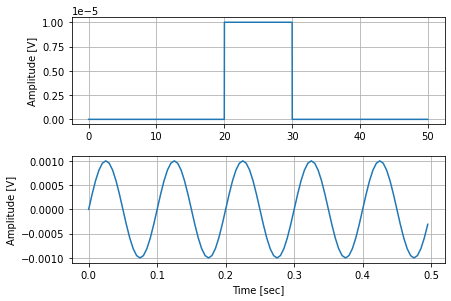

In [1]:
# Import libraries
import time
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Create and plot signals to be convolved
srate = 200 # Sampling rate for both generated signals [Hz]

# - Squared signal centered
x_amplitude = 1e-5          # Amplitude of x [V]
x_length = 10e3             # Length of x [n]
x_amplitude_length = 2e3    # Length of amplitude data points, must be less than x_length [n]
x = np.zeros(int(x_length))
x_amplitude_index = np.arange(np.floor((x_length-x_amplitude_length)/2),np.floor((x_length+x_amplitude_length)/2), dtype=int)
x[(x_amplitude_index)] = x_amplitude
x_time = np.arange(0, len(x)/srate, 1/srate)

# - Sine wave
sine_freq = 10 # Frequency of sinewave [Hz]
sine_amplitude = 10e-4  # Amplitude of sinewave [V]
sine_length = 10e3      # Length of sinewave [n]
y_time = np.linspace(0, int(sine_length/(20*sine_freq)), int(sine_length))   # Time vector for sinewave [sec]
y = sine_amplitude * np.sin(2*np.pi*y_time*sine_freq)

# Plot individual signals
[fig, ax] = plt.subplots(2,1)
fig.tight_layout()
ax[0].plot(x_time, x)
ax[0].grid()

ax[0].set_ylabel('Amplitude [V]')

plot_samples = np.arange(0,100)
ax[1].plot(y_time[plot_samples], y[plot_samples])
ax[1].grid()
ax[1].set_xlabel('Time [sec]')
ax[1].set_ylabel('Amplitude [V]')

plt.show()


## Convolve signals - FFT
Convolve the previously generated signals using the FFT method. Plot the result

FFT took: 0.00 msec


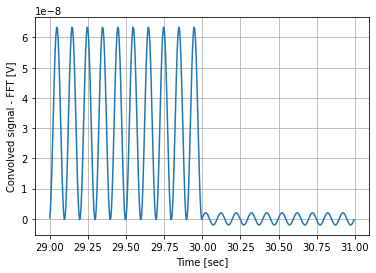

In [8]:
# Convolve signals with FFT method
timer_fft = time.time()
convolved_fft = signal.convolve(x, y, method='fft')
convolved_fft_time = np.arange(0, len(convolved_fft)/srate, 1/srate)
print(f'FFT took: {(time.time()-timer_fft)*1e3:.2f} msec')

# Plot
plot_idx = np.arange(29*srate, 31*srate)
[fig, ax] = plt.subplots(1,1)
ax.plot(convolved_fft_time[plot_idx], convolved_fft[plot_idx])
ax.grid()
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Convolved signal - FFT [V]')
plt.show()

## Convolve signals - Direct
Convolve both signals using the **direct** method and plot the result.

Direct method took: 56.01 msec


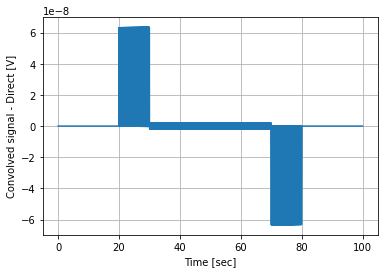

In [3]:
# Convolve with direct method
timer_direct = time.time()
convolved_direct = signal.convolve(x, y, method='direct')
convolved_direct_time = np.arange(0, len(convolved_direct)/srate, 1/srate)
print(f'Direct method took: {(time.time()-timer_direct)*1e3:.2f} msec')

# Plot
[fig, ax] = plt.subplots(1,1)
ax.plot(convolved_direct_time, convolved_direct)
ax.grid()
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Convolved signal - Direct [V]')
plt.show()